In [ ]:
pip install pandas scikit-learn xgboost matplotlib seaborn shap fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Install fairlearn to resolve ModuleNotFoundError
!pip install fairlearn
# Required Libraries (Imported at the start to avoid repetition)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import shap
from fairlearn.metrics import MetricFrame, equalized_odds_difference
import warnings
warnings.filterwarnings("ignore")

✅ 資料前幾筆：
   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  

✅ 資料維度： (16714, 11)

✅ 資料欄位型態：
rev_util       float64
age            float64
late_30_59     float64
debt_ratio     float64
monthly_inc    float64
open_credit    float64
late_90        float64
real_estate

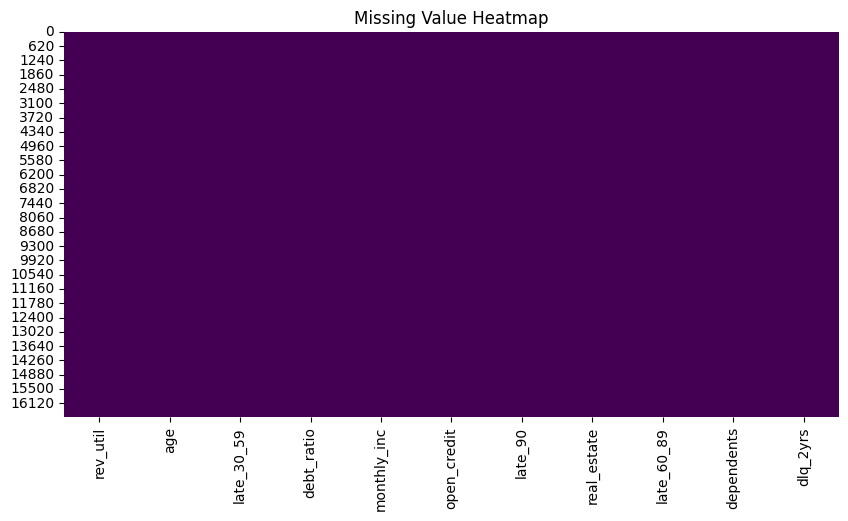


✅ 目標變數比例：
dlq_2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


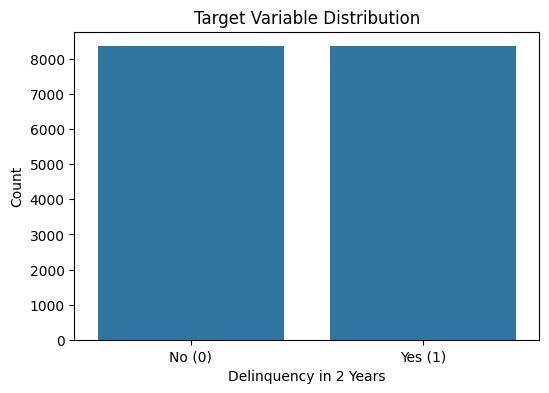


✅ 數值特徵描述統計：
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.500000  250000.000000   

        open_credit       late_90   real_estate    late_60_89    dependents  \
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000   
mean       8.503709      0.863827      1.047445      0.734354      0.944358   
std        5.370965      7.16

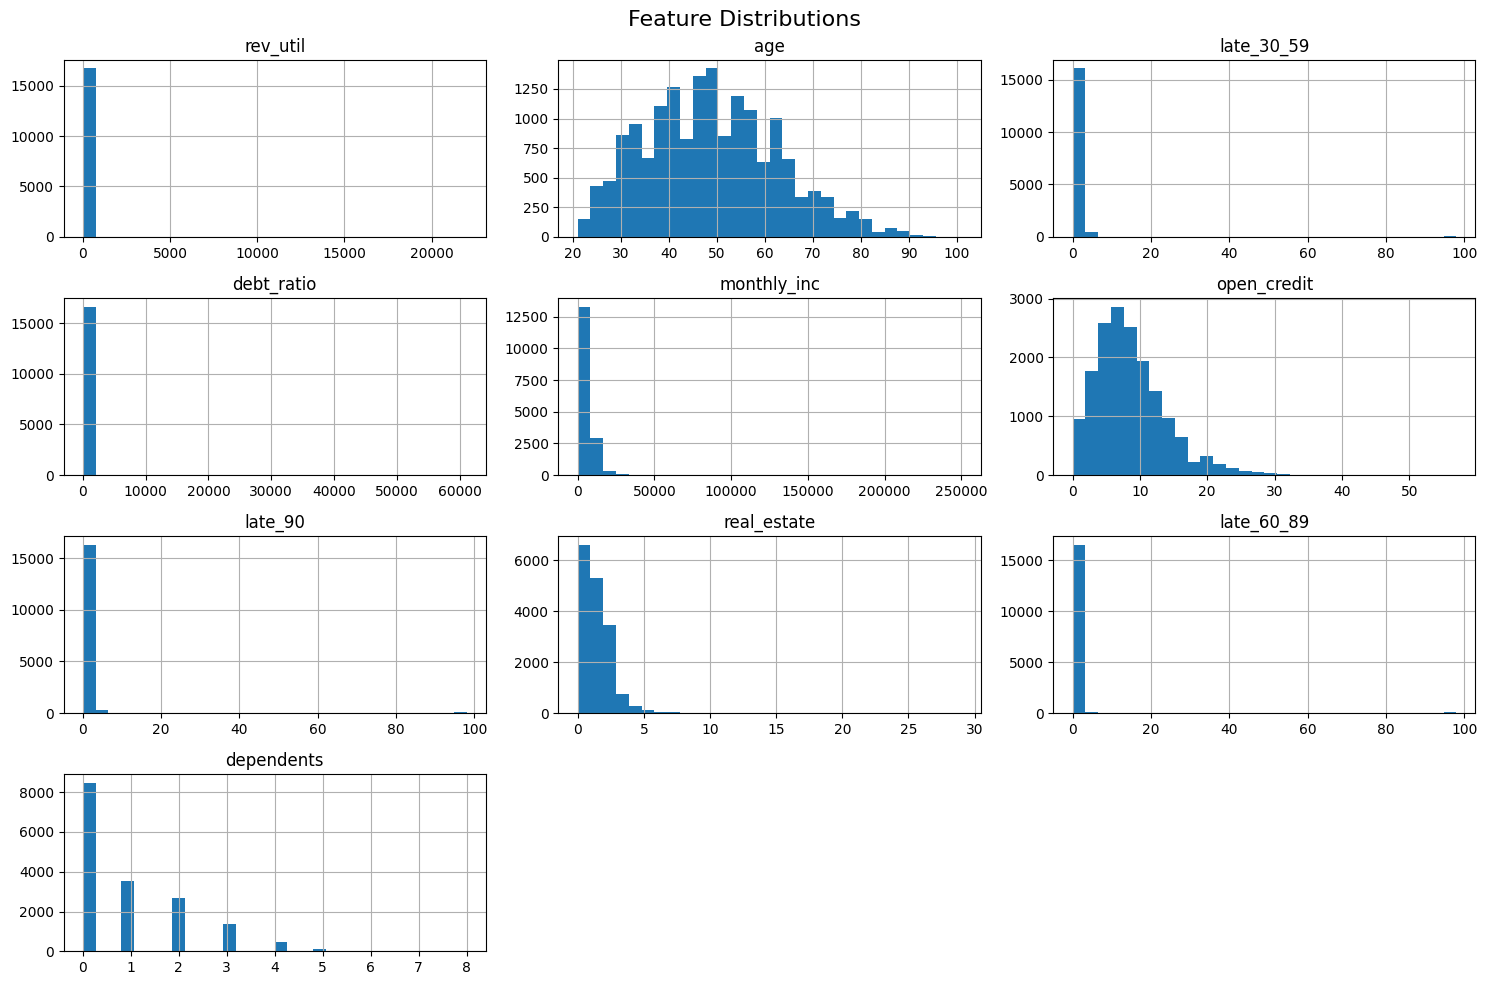

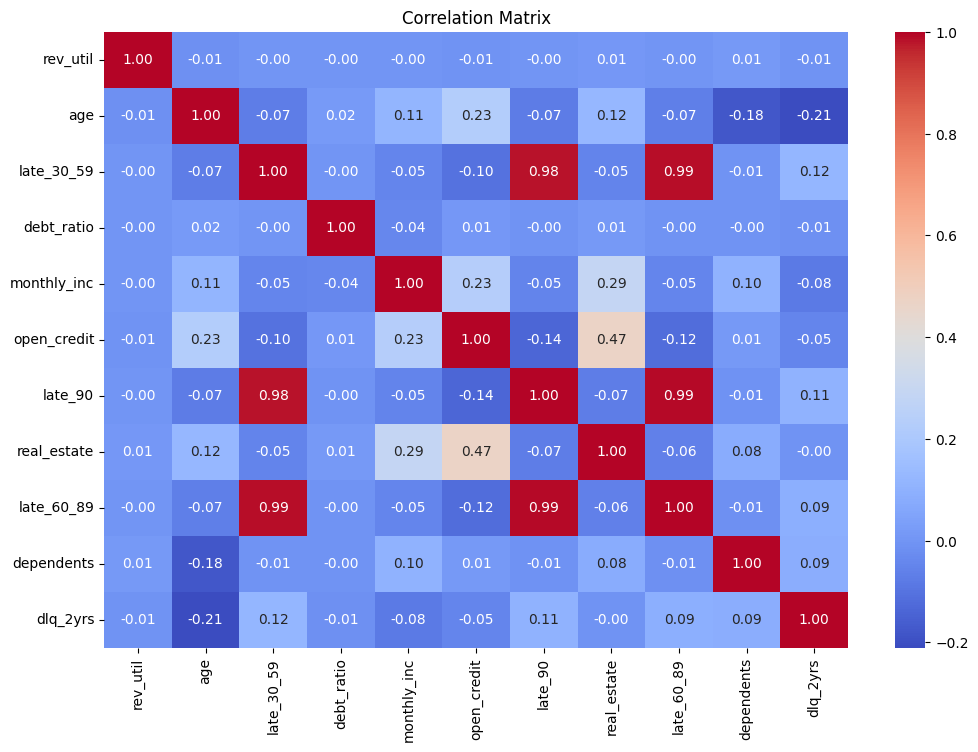

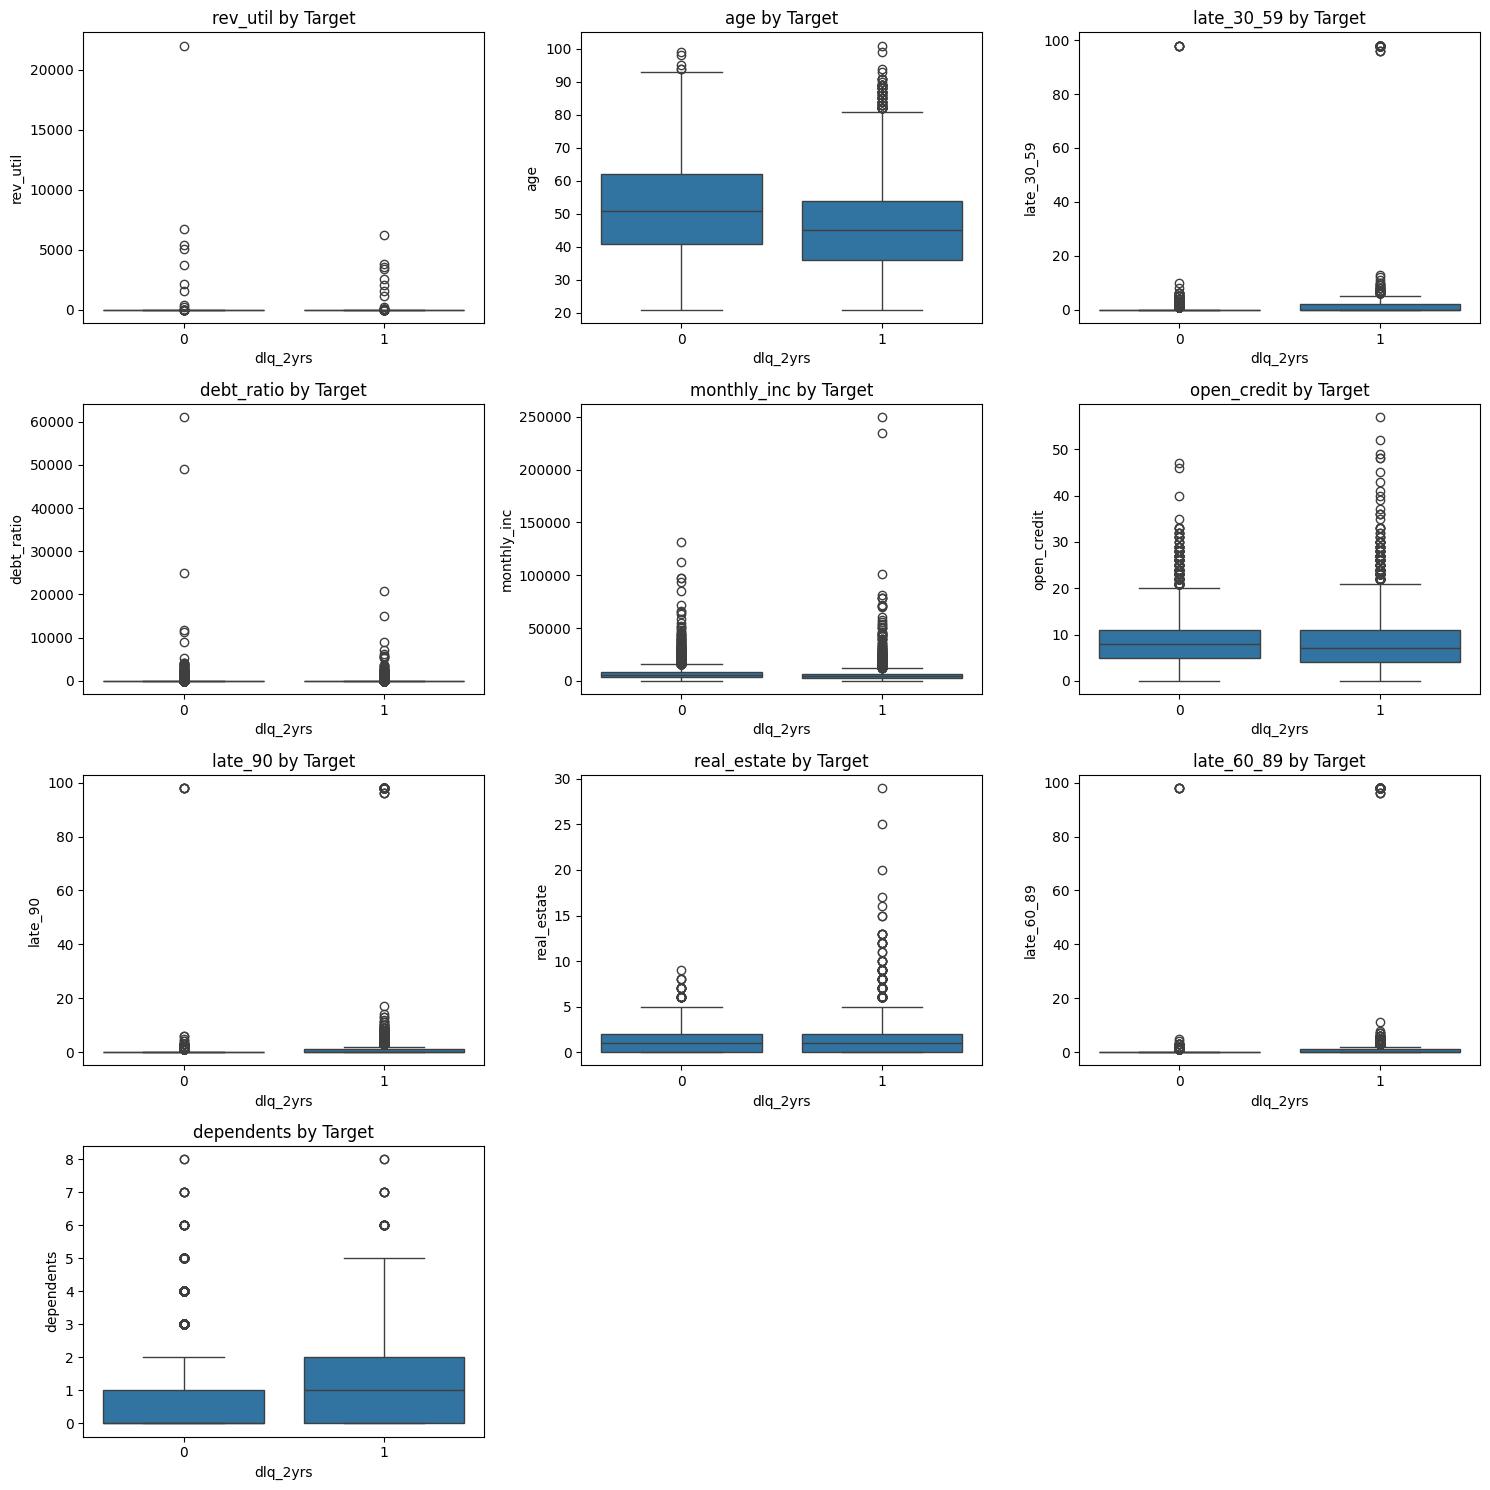


✅ 異常值處理：
✅ 已處理 debt_ratio 的異常值，替換為中位數
✅ 已處理 rev_util 的異常值，替換為中位數
✅ 已處理 monthly_inc 的異常值，替換為中位數

✅ 異常值處理後描述統計：
         debt_ratio      rev_util   monthly_inc
count  16714.000000  16714.000000  16714.000000
mean       0.335791      0.497568   5351.629652
std        0.238613      0.408262   2880.570347
min        0.000000      0.000000      1.000000
25%        0.155971      0.082397   3200.000000
50%        0.322295      0.443041   5000.000000
75%        0.466642      0.922447   7000.000000
max        1.099478      2.139535  14220.000000

✅ 分箱分佈：

age_binned:
                count      mean
age_binned                     
(20.999, 36.0]   3530  0.615014
(36.0, 44.0]     3196  0.562265
(44.0, 52.0]     3636  0.543729
(52.0, 61.0]     3238  0.451822
(61.0, 101.0]    3114  0.304753

debt_ratio_binned:
                   count      mean
debt_ratio_binned                 
(-0.001, 0.119]     3343  0.465151
(0.119, 0.255]      3343  0.453784
(0.255, 0.35]       3342  0.485338
(0.35, 0.52]    

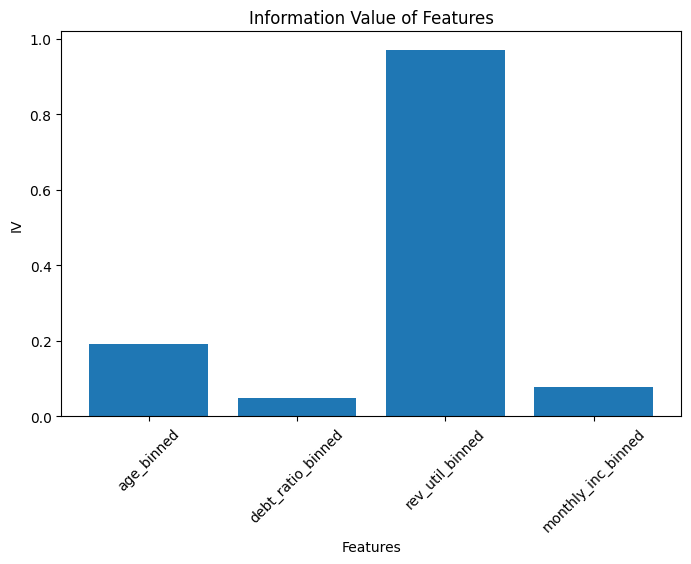


✅ 標準化後的資料前幾筆：
   rev_util       age  late_30_59  debt_ratio  monthly_inc  open_credit  \
0 -1.201638 -0.776567   -0.154791   -0.140989     0.030679    -0.838554   
1  0.507101  1.021262   -0.154791    0.568509     0.919418     0.092405   
2 -1.064190  0.589783   -0.154791   -1.119858    -0.122073     1.581940   
3 -0.316402  1.380828   -0.154791   -0.165623     0.311882     1.395748   
4  1.230698 -1.064219   -0.015373   -1.407304    -0.642819    -1.583322   

    late_90  real_estate  late_60_89  dependents  
0 -0.120522    -0.037284   -0.102872    1.714814  
1 -0.120522    -0.037284   -0.102872   -0.787782  
2 -0.120522    -0.823123   -0.102872   -0.787782  
3 -0.120522     0.748554   -0.102872   -0.787782  
4 -0.120522    -0.823123   -0.102872    0.046416  

✅ 已儲存處理後數據至 Credit_Risk_Cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
df = pd.read_csv("/content/Credit Risk Benchmark Dataset.csv")

# ===== 1. 初步資料檢視 =====
print("✅ 資料前幾筆：")
print(df.head())

print("\n✅ 資料維度：", df.shape)

print("\n✅ 資料欄位型態：")
print(df.dtypes)

# 檢查類別變數
print("\n✅ 類別變數概況：")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# ===== 2. 缺失值檢查 =====
print("\n✅ 缺失值概況：")

# 檢查缺失值並填補（若有）
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\n✅ 使用中位數填補缺失值：")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    print("✅ 填補後的缺失值概況：")
    print(df.isnull().sum())
else:
    print("\n✅ 無缺失值，無需填補。")

# 視覺化缺失值（若有）
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# ===== 3. 目標變數比例 =====
target_counts = df['dlq_2yrs'].value_counts(normalize=True)
print("\n✅ 目標變數比例：")
print(target_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='dlq_2yrs', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Delinquency in 2 Years")
plt.ylabel("Count")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# ===== 4. 數值特徵的描述統計 =====
print("\n✅ 數值特徵描述統計：")
print(df.describe())

# ===== 5. 分佈圖（直方圖） =====
df.drop('dlq_2yrs', axis=1).hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# ===== 6. 相關性矩陣 =====
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ===== 7. Boxplot 觀察離群值與群體差異（以目標變數分組） =====
features = df.columns.drop('dlq_2yrs')
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='dlq_2yrs', y=feature, data=df)
    plt.title(f"{feature} by Target")
    plt.tight_layout()
plt.show()
# ===== 7.1 異常值處理（修正） =====
print("\n✅ 異常值處理：")
def replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    # 僅處理極端值，保留正常範圍
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    # 處理0值（針對monthly_inc）
    if column == 'monthly_inc':
        data[column] = data[column].replace(0, median)
    return data

for col in ['debt_ratio', 'rev_util', 'monthly_inc']:
    df = replace_outliers_iqr(df, col)
    print(f"✅ 已處理 {col} 的異常值，替換為中位數")

# 檢查處理後描述統計
print("\n✅ 異常值處理後描述統計：")
print(df[['debt_ratio', 'rev_util', 'monthly_inc']].describe())

# ===== 8. 特徵工程：分箱與 IV 計算 =====
continuous_features = ['age', 'debt_ratio', 'rev_util', 'monthly_inc']
df['rev_util_binned'] = pd.cut(df['rev_util'], bins=[-float('inf'), 0.3, 0.6, 0.9, 1.2, float('inf')], duplicates='drop')
for feature in continuous_features:
    if feature != 'rev_util':
        df[f'{feature}_binned'] = pd.qcut(df[feature], q=5, duplicates='drop')

# 檢查分箱分佈
print("\n✅ 分箱分佈：")
for feature in continuous_features:
    print(f"\n{feature}_binned:")
    print(df.groupby(f'{feature}_binned')['dlq_2yrs'].agg(['count', 'mean']))

# 定義 IV 計算函數
def calculate_iv(df, feature, target):
    total_good = df[target].value_counts()[0]
    total_bad = df[target].value_counts()[1]
    groups = df.groupby(feature)[target].agg(['count', 'sum'])
    groups['good'] = groups['count'] - groups['sum']
    groups['bad'] = groups['sum']
    groups['good_dist'] = (groups['good'] + 0.5) / (total_good + 0.5 * len(groups))
    groups['bad_dist'] = (groups['bad'] + 0.5) / (total_bad + 0.5 * len(groups))
    groups['WOE'] = np.log(groups['good_dist'] / groups['bad_dist']).replace([np.inf, -np.inf], 0)
    groups['IV'] = (groups['good_dist'] - groups['bad_dist']) * groups['WOE']
    return groups['IV'].sum()

# 計算 IV
features = [f'{feature}_binned' for feature in continuous_features]
iv_results = {f: calculate_iv(df, f, 'dlq_2yrs') for f in features}
print("\n✅ 特徵 IV 值（分箱後）：")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(iv_results.keys(), iv_results.values())
plt.title("Information Value of Features")
plt.xlabel("Features")
plt.ylabel("IV")
plt.xticks(rotation=45)
plt.show()

# ===== 9. 特徵標準化 =====
# 保留原始值
df['age_raw'] = df['age']
df['monthly_inc_raw'] = df['monthly_inc']
df['debt_ratio_raw'] = df['debt_ratio']
df['rev_util_raw'] = df['rev_util']

# 標準化
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['dlq_2yrs', 'age_raw', 'monthly_inc_raw', 'debt_ratio_raw', 'rev_util_raw'])
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\n✅ 標準化後的資料前幾筆：")
print(df[numeric_columns].head())

# 儲存處理後數據
df.to_csv("/content/Credit_Risk_Cleaned.csv", index=False)
print("\n✅ 已儲存處理後數據至 Credit_Risk_Cleaned.csv")

=== Baseline Modeling ===


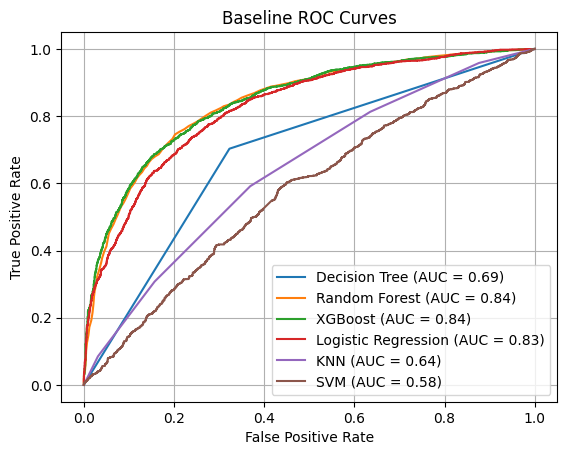

                     Accuracy  Precision    Recall        F1       AUC
XGBoost              0.765105   0.775622  0.740040  0.757414  0.843697
Random Forest        0.770887   0.777409  0.753320  0.765175  0.842089
Logistic Regression  0.747757   0.751650  0.733199  0.742310  0.825459
Decision Tree        0.689930   0.681357  0.703018  0.692018  0.690047
KNN                  0.611366   0.611481  0.591549  0.601350  0.642815
SVM                  0.563111   0.563858  0.522334  0.542302  0.579015
Selected Features: ['rev_util', 'age', 'monthly_inc', 'monthly_inc_raw', 'rev_util_raw']
=== Modeling After Feature Selection ===


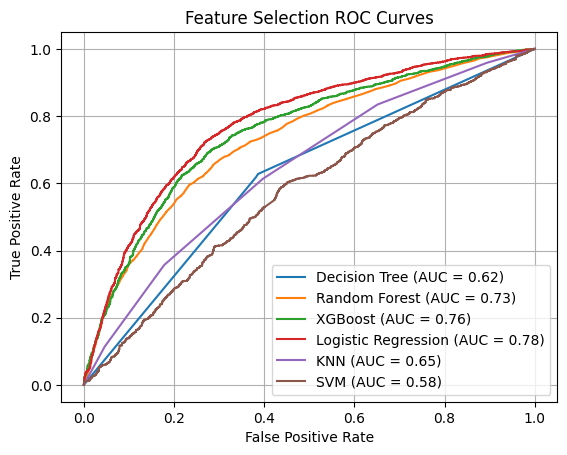

                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.722832   0.728984  0.701408  0.714930  0.779159
XGBoost              0.704885   0.699168  0.709859  0.704473  0.755265
Random Forest        0.682752   0.679807  0.680080  0.679944  0.733381
KNN                  0.608175   0.602767  0.613682  0.608175  0.645378
Decision Tree        0.618943   0.614252  0.620926  0.617571  0.620307
SVM                  0.563908   0.564726  0.523139  0.543138  0.578773


 98%|===================| 4920/5015 [00:20<00:00]       

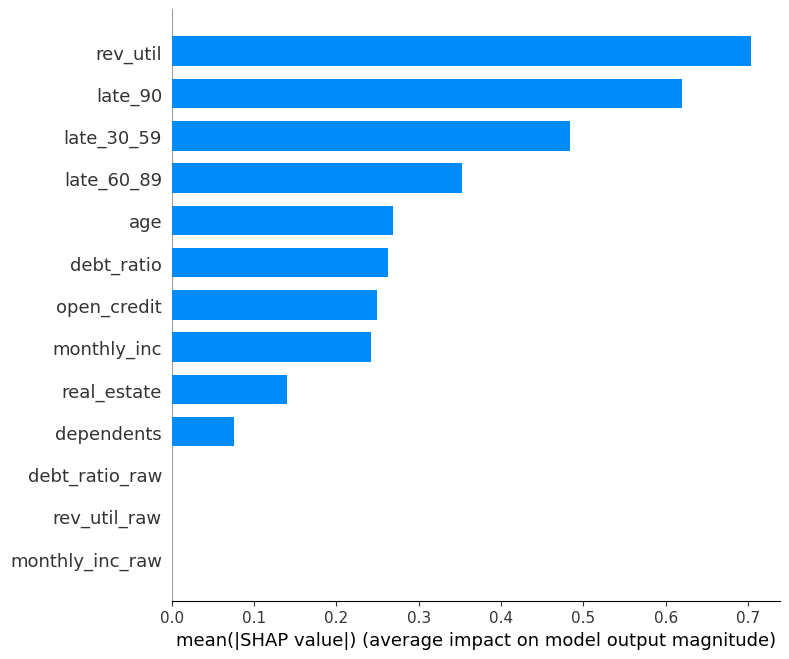

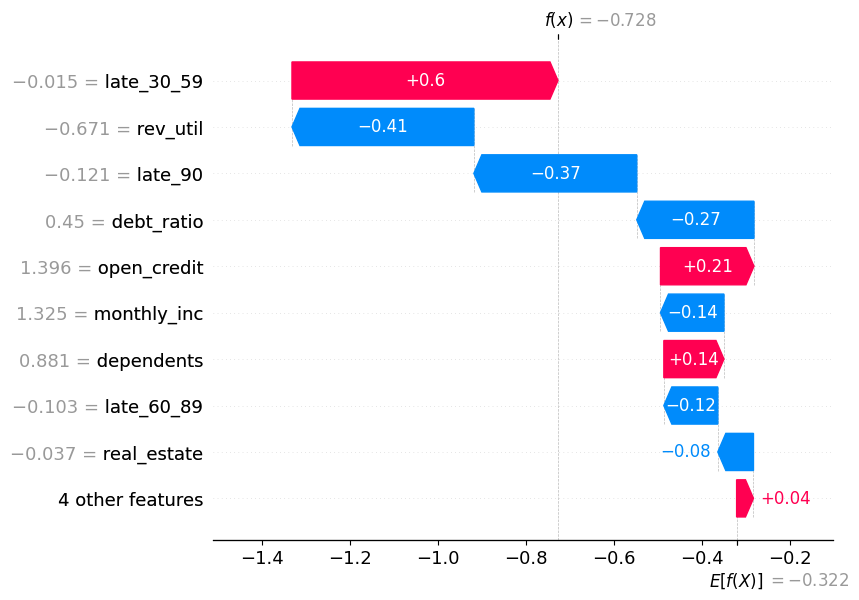


✅ 使用 GridSearchCV 調整 XGBoost 模型:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV AUC: 0.8516569240405586


<Figure size 800x500 with 0 Axes>

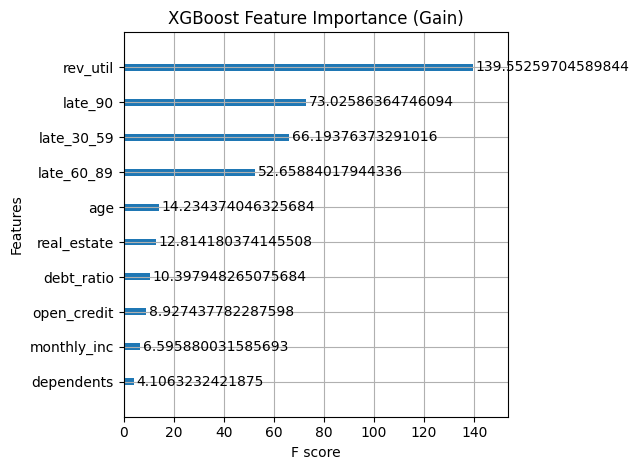

Fairness (Equal Opportunity Difference): 0.7760869565217391

=== Baseline Results ===
                     Accuracy  Precision    Recall        F1       AUC
XGBoost              0.765105   0.775622  0.740040  0.757414  0.843697
Random Forest        0.770887   0.777409  0.753320  0.765175  0.842089
Logistic Regression  0.747757   0.751650  0.733199  0.742310  0.825459
Decision Tree        0.689930   0.681357  0.703018  0.692018  0.690047
KNN                  0.611366   0.611481  0.591549  0.601350  0.642815
SVM                  0.563111   0.563858  0.522334  0.542302  0.579015

=== Feature Selection Results ===
                     Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.722832   0.728984  0.701408  0.714930  0.779159
XGBoost              0.704885   0.699168  0.709859  0.704473  0.755265
Random Forest        0.682752   0.679807  0.680080  0.679944  0.733381
KNN                  0.608175   0.602767  0.613682  0.608175  0.645378
Decision Tree        0.6189

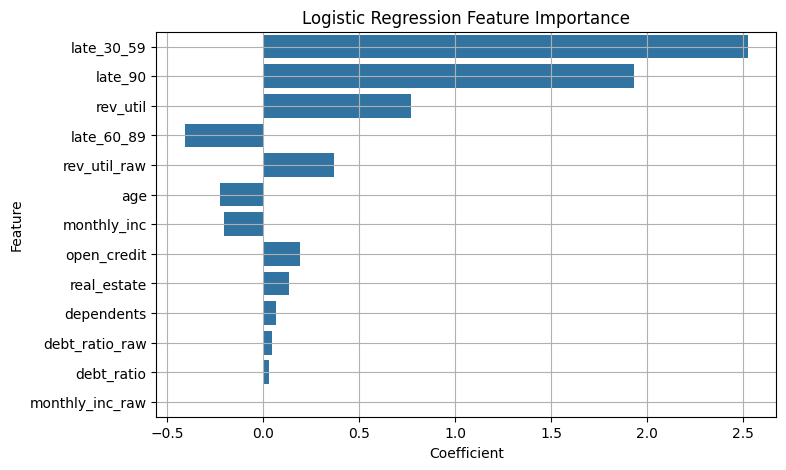


✅ 交叉驗證 (RandomForestClassifier)：
交叉驗證 AUC 分數： [0.83534503 0.83829841 0.84661274 0.84513847 0.84249193]
平均 AUC： 0.8415773155353193


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import shap
from fairlearn.metrics import MetricFrame, equalized_odds_difference
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# 1. 讀取特徵工程的處理後數據
df = pd.read_csv("/content/Credit_Risk_Cleaned.csv")

# 2. 預處理
X = df.drop(['dlq_2yrs', 'age_raw'] + [f'{feat}_binned' for feat in ['age', 'debt_ratio', 'rev_util', 'monthly_inc']], axis=1)
y = df['dlq_2yrs']

# 標準化已在特徵工程完成，無需重複
X_scaled = X  # Data is already standardized in Credit_Risk_Cleaned.csv

# 訓練測試集切分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 應用 SMOTE 平衡數據
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

# 3. 定義模型
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

# 4. 訓練與評估函數
def evaluate_models(X_train, X_test, y_train, y_test, models, stage='Baseline'):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        results[name] = {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'AUC': auc
        }
    plt.title(f'{stage} ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
    return pd.DataFrame(results).T

# 5. 初次建模
print("=== Baseline Modeling ===")
baseline_results = evaluate_models(X_train, X_test, y_train, y_test, models)
print(baseline_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 6. 特徵選擇
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected Features: {selected_features}")

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.3, random_state=42)

# 7. 特徵篩選後建模
print("=== Modeling After Feature Selection ===")
fs_results = evaluate_models(X_train_fs, X_test_fs, y_train_fs, y_test_fs, models, stage='Feature Selection')
print(fs_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 8. SHAP分析（使用XGBoost）
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
explainer = shap.Explainer(xgb_model, X_test_df)
shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df, plot_type='bar')
# 顯示第一筆測試資料的 waterfall 分析
shap.plots.waterfall(shap_values[0])

# 8.1: Tune XGBoost with GridSearchCV
print("\n✅ 使用 GridSearchCV 調整 XGBoost 模型:")
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}
xgb_tune = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_tune, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

# 8.2: Plot XGBoost Feature Importance
plt.figure(figsize=(8, 5))
xgb.plot_importance(best_model.get_booster(), importance_type='gain', max_num_features=10, title='XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()

# 9. 公平性評估（以年齡為敏感群體示例）
age_group = pd.cut(df['age_raw'], bins=[20, 30, 40, 50, 60, 70, 80, 100], labels=False)
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
metric_frame = MetricFrame(
    metrics={'recall': recall_score},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=age_group.loc[y_test.index]
)
print("Fairness (Equal Opportunity Difference):", equalized_odds_difference(y_test, y_pred, sensitive_features=age_group.loc[y_test.index]))

# 10. 模型總結
print("\n=== Baseline Results ===")
print(baseline_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))
print("\n=== Feature Selection Results ===")
print(fs_results[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].sort_values('AUC', ascending=False))

# 11. Logistic Regression 特徵重要性
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Logistic Regression Feature Importance')
plt.grid(True)
plt.show()

# 12. 交叉驗證（RandomForestClassifier）
print("\n✅ 交叉驗證 (RandomForestClassifier)：")
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
print("交叉驗證 AUC 分數：", cv_scores)
print("平均 AUC：", cv_scores.mean())

### 測試：比較需不需要IQR


✅ 異常值量化分析：

✅ 各特徵的異常值概況：

age:
  - 異常值數量: 56 (0.34%)
  - IQR 範圍: [8.00, 88.00]
  - 異常值在目標變數中的分佈: 
dlq_2yrs
0    0.696429
1    0.303571
Name: proportion, dtype: float64

debt_ratio:
  - 異常值數量: 1031 (6.17%)
  - IQR 範圍: [-0.41, 1.10]
  - 異常值在目標變數中的分佈: 
dlq_2yrs
1    0.591659
0    0.408341
Name: proportion, dtype: float64

rev_util:
  - 異常值數量: 50 (0.30%)
  - IQR 範圍: [-1.18, 2.19]
  - 異常值在目標變數中的分佈: 
dlq_2yrs
1    0.72
0    0.28
Name: proportion, dtype: float64

monthly_inc:
  - 異常值數量: 779 (4.66%)
  - IQR 範圍: [-3538.25, 14239.75]
  - 異常值在目標變數中的分佈: 
dlq_2yrs
0    0.604621
1    0.395379
Name: proportion, dtype: float64

✅ 開始進行選擇性 IQR 異常值處理：
✅ 已對 age 進行 Winsorizing，異常值數量: 56
✅ 已為 debt_ratio 新增異常值標記欄位，異常值數量: 1031
✅ 已為 rev_util 新增異常值標記欄位，異常值數量: 50
✅ 已對 monthly_inc 進行 Winsorizing，異常值數量: 779

✅ 處理前後分佈比較：


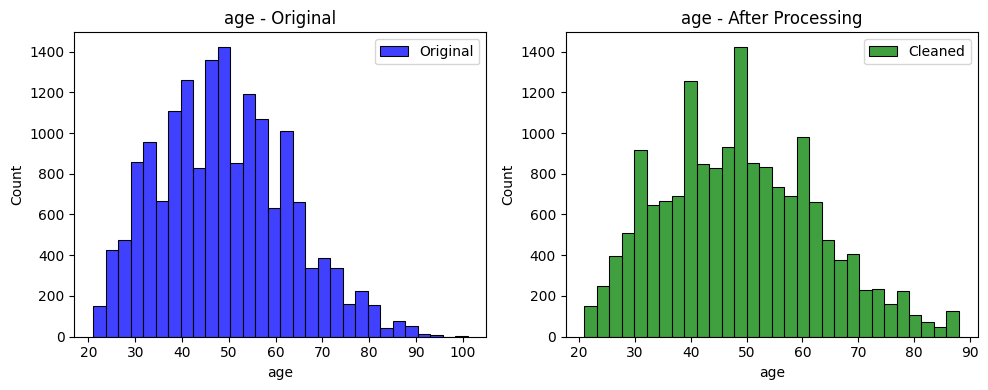

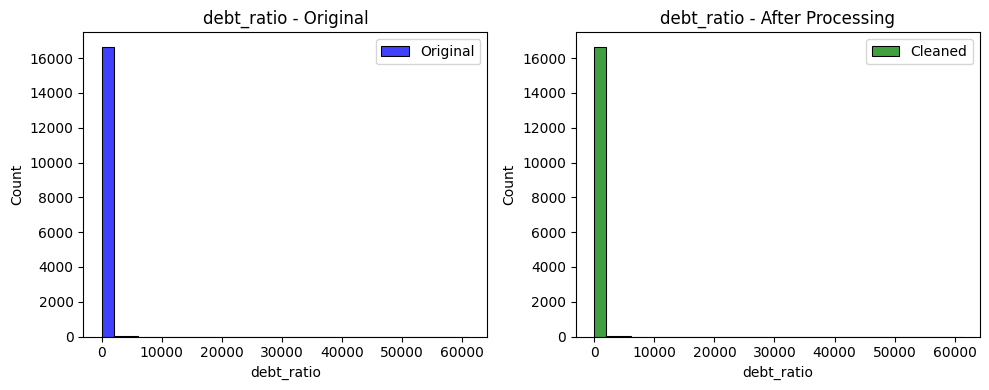

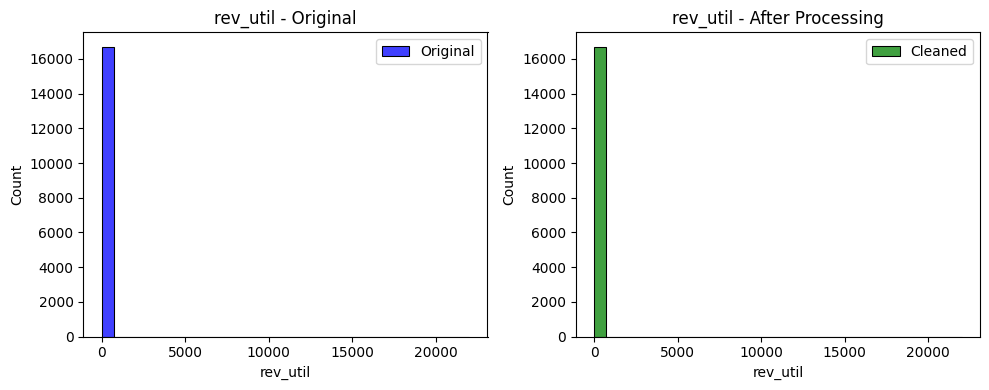

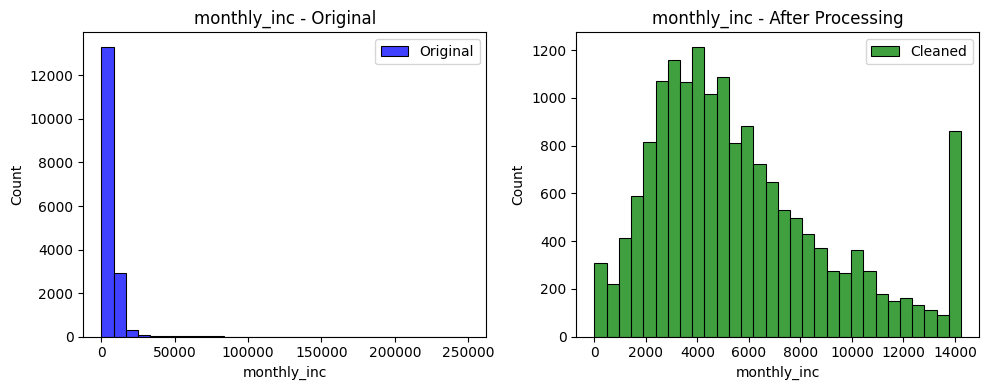


✅ 異常值處理完成，數據框已更新

✅ 分箱分佈：

age_binned:
                count      mean
age_binned                     
(20.999, 36.0]   3530  0.615014
(36.0, 44.0]     3196  0.562265
(44.0, 52.0]     3636  0.543729
(52.0, 61.0]     3238  0.451822
(61.0, 88.0]     3114  0.304753

debt_ratio_binned:
                   count      mean
debt_ratio_binned                 
(-0.001, 0.119]     3343  0.465151
(0.119, 0.255]      3343  0.453784
(0.255, 0.394]      3342  0.447636
(0.394, 0.604]      3343  0.521687
(0.604, 61106.5]    3343  0.611726

rev_util_binned:
                 count      mean
rev_util_binned                 
(-inf, 0.3]       7050  0.250780
(0.3, 0.6]        2557  0.498631
(0.6, 0.9]        2592  0.667052
(0.9, 1.2]        4190  0.787351
(1.2, inf]         325  0.880000

monthly_inc_binned:
                    count      mean
monthly_inc_binned                 
(-0.001, 2800.0]     3367  0.574993
(2800.0, 4200.0]     3396  0.570082
(4200.0, 5833.0]     3289  0.503497
(5833.0, 8400.0]     

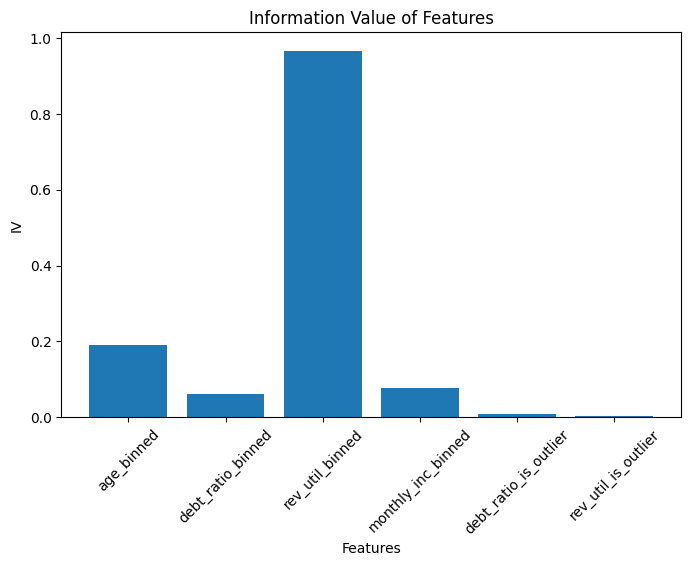


✅ 標準化後的資料前幾筆：
   rev_util       age  late_30_59  debt_ratio  monthly_inc  open_credit  \
0 -0.023488 -0.777560   -0.154791   -0.042628    -0.082692    -0.838554   
1 -0.020069  1.024276   -0.154791   -0.042393     0.652029     0.092405   
2 -0.023213  0.591835   -0.154791   -0.042952    -0.208973     1.581940   
3 -0.021717  1.384643   -0.154791   -0.042636     0.149778     1.395748   
4 -0.018622 -1.065853   -0.015373   -0.043048    -0.639474    -1.583322   

    late_90  real_estate  late_60_89  dependents  debt_ratio_is_outlier  \
0 -0.120522    -0.037284   -0.102872    1.714814              -0.256398   
1 -0.120522    -0.037284   -0.102872   -0.787782              -0.256398   
2 -0.120522    -0.823123   -0.102872   -0.787782              -0.256398   
3 -0.120522     0.748554   -0.102872   -0.787782              -0.256398   
4 -0.120522    -0.823123   -0.102872    0.046416              -0.256398   

   rev_util_is_outlier  
0            -0.054777  
1            -0.054777  
2       

In [ ]:
# ===== 7.1 異常值量化分析 =====
print("\n✅ 異常值量化分析：")
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_columns = ['age', 'debt_ratio', 'rev_util', 'monthly_inc']
outlier_summary = {}
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outlier_summary[col] = {
        'outlier_count': len(outliers),
        'outlier_ratio': len(outliers) / len(df),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_target_dist': outliers['dlq_2yrs'].value_counts(normalize=True) if not outliers.empty else pd.Series()
    }

print("\n✅ 各特徵的異常值概況：")
for col, summary in outlier_summary.items():
    print(f"\n{col}:")
    print(f"  - 異常值數量: {summary['outlier_count']} ({summary['outlier_ratio']*100:.2f}%)")
    print(f"  - IQR 範圍: [{summary['lower_bound']:.2f}, {summary['upper_bound']:.2f}]")
    print(f"  - 異常值在目標變數中的分佈: \n{summary['outlier_target_dist']}")

# ===== 7.2 選擇性 IQR 處理與異常值標記 =====
print("\n✅ 開始進行選擇性 IQR 異常值處理：")
df_cleaned = df.copy()
features_to_process = ['age', 'monthly_inc']  # 僅處理 age 和 monthly_inc
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    if col in features_to_process and len(outliers) > 0:
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"✅ 已對 {col} 進行 Winsorizing，異常值數量: {len(outliers)}")
    elif len(outliers) > 0:
        df_cleaned[f'{col}_is_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)
        print(f"✅ 已為 {col} 新增異常值標記欄位，異常值數量: {len(outliers)}")
    else:
        print(f"✅ {col} 無異常值，無需處理")

# 視覺化處理前後分佈
print("\n✅ 處理前後分佈比較：")
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, color='blue', label='Original')
    plt.title(f"{col} - Original")
    plt.legend()
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], bins=30, color='green', label='Cleaned')
    plt.title(f"{col} - After Processing")
    plt.legend()
    plt.tight_layout()
    plt.show()

df = df_cleaned
print("\n✅ 異常值處理完成，數據框已更新")

# ===== 8. 特徵工程：分箱與 IV 計算 =====
continuous_features = ['age', 'debt_ratio', 'rev_util', 'monthly_inc']
df['rev_util_binned'] = pd.cut(df['rev_util'], bins=[-float('inf'), 0.3, 0.6, 0.9, 1.2, float('inf')], duplicates='drop')
for feature in continuous_features:
    if feature != 'rev_util':
        df[f'{feature}_binned'] = pd.qcut(df[feature], q=5, duplicates='drop')

print("\n✅ 分箱分佈：")
for feature in continuous_features:
    print(f"\n{feature}_binned:")
    print(df.groupby(f'{feature}_binned')['dlq_2yrs'].agg(['count', 'mean']))

def calculate_iv(df, feature, target):
    total_good = df[target].value_counts()[0]
    total_bad = df[target].value_counts()[1]
    groups = df.groupby(feature)[target].agg(['count', 'sum'])
    groups['good'] = groups['count'] - groups['sum']
    groups['bad'] = groups['sum']
    groups['good_dist'] = (groups['good'] + 0.5) / (total_good + 0.5 * len(groups))
    groups['bad_dist'] = (groups['bad'] + 0.5) / (total_bad + 0.5 * len(groups))
    groups['WOE'] = np.log(groups['good_dist'] / groups['bad_dist']).replace([np.inf, -np.inf], 0)
    groups['IV'] = (groups['good_dist'] - groups['bad_dist']) * groups['WOE']
    return groups['IV'].sum()

features = [f'{feat}_binned' for feat in continuous_features] + ['debt_ratio_is_outlier', 'rev_util_is_outlier']
iv_results = {f: calculate_iv(df, f, 'dlq_2yrs') for f in features}
print("\n✅ 特徵 IV 值（分箱後）：")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")

plt.figure(figsize=(8, 5))
plt.bar(iv_results.keys(), iv_results.values())
plt.title("Information Value of Features")
plt.xlabel("Features")
plt.ylabel("IV")
plt.xticks(rotation=45)
plt.show()

# ===== 9. 特徵標準化 =====
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('dlq_2yrs')
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\n✅ 標準化後的資料前幾筆：")
print(df[numeric_columns].head())